In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import requests
import time
import pprint
import csv

fire = "data/Amazon_mean_df.csv"
defo = "data/deforestation_mean_merge.csv"

fire_df = pd.read_csv(fire)
defo_df = pd.read_csv(defo)

In [2]:
fire_df

,Unnamed: 0,Number of Fires
0,AC,3417.25
1,AM,5873.35
2,AP,1255.80
3,MA,18763.95
4,MT,32729.50
5,PA,28892.05
6,RO,9269.35
7,RR,1472.70
8,TO,10621.60


In [3]:
new_fire = fire_df.rename(columns={"Unnamed: 0": "States"})
new_fire

,States,Number of Fires
0,AC,3417.25
1,AM,5873.35
2,AP,1255.80
3,MA,18763.95
4,MT,32729.50
5,PA,28892.05
6,RO,9269.35
7,RR,1472.70
8,TO,10621.60


In [4]:
defo_df

,Unnamed: 0,state,square km
0,0,AC,424.70
1,1,AM,751.90
2,2,AP,32.30
3,3,MA,709.65
4,4,MT,4284.40
5,5,PA,4683.75
6,6,RO,1797.55
7,7,RR,232.15
8,8,TO,139.40


In [5]:
new = defo_df.drop(['Unnamed: 0'], axis=1)

new_defo = new.rename(columns={"state": "States", "square km": "Square km"})
new_defo

,States,Square km
0,AC,424.70
1,AM,751.90
2,AP,32.30
3,MA,709.65
4,MT,4284.40
5,PA,4683.75
6,RO,1797.55
7,RR,232.15
8,TO,139.40


In [51]:
merged = new_defo.merge(new_fire, on='States')
merged

merged.to_csv("data/merged_fireanddeforestation.csv")

In [7]:
xaxis = list(new_defo.States)
xaxis

['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO']

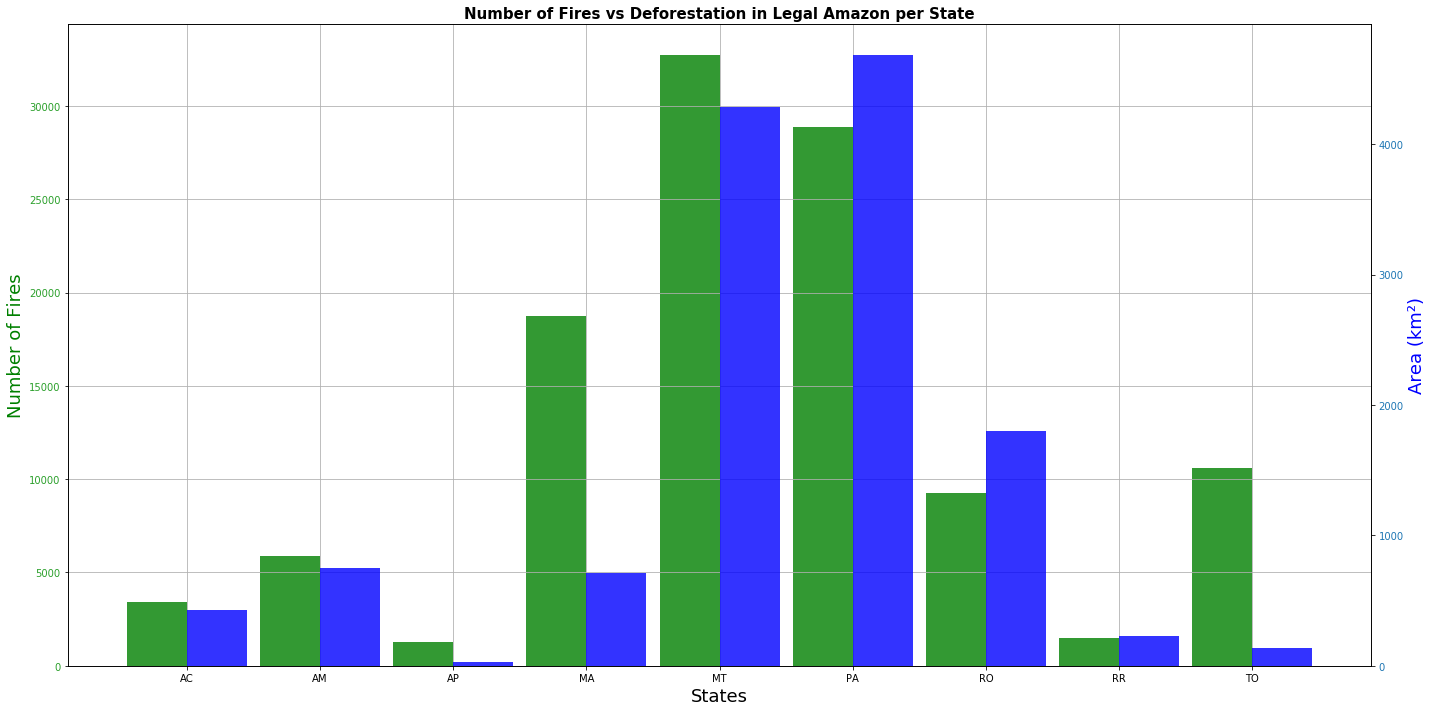

In [15]:
#plt.bar(xaxis, Amazon_mean_df["Fires vs Deforestation"], align="center")

#plt.title("Number of Fires vs Deforestation in Legal Amazon per State")
#plt.xlabel("State")
#plt.ylabel("Fires vs Deforestation")

#plt.show()

#ADD IN SAVE FIGURE
#alpha=0.6,

# Create 2 bar graph in the same fig for Annual Deforestation and rain in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(20, 10))
# Deforestation
for index, row in merged.iterrows():
    def_graph = ax1.bar(merged["States"][index], merged["Number of Fires"][index],color='g', alpha=.8,\
                        align="edge",width=-0.45)
ax1.set_title("Number of Fires vs Deforestation in Legal Amazon per State", fontweight = "bold", fontsize = 15)
ax1.set_xlabel("States",fontsize = 18)
ax1.set_ylabel("Number of Fires",fontsize = 18, color ='g')
ax1.tick_params(axis='y',labelcolor='tab:green')
# Rain
ax2 = ax1.twinx()
for index, row in merged.iterrows():
    rain_graph = ax2.bar(merged["States"][index], merged["Square km"][index],color='b', alpha=.8,\
                        align="edge",width=+0.45)
ax2.set_ylabel("Area (km²)",fontsize = 18, color ='b')
ax2.tick_params(axis='y',labelcolor='tab:blue')
#other configurations
plt.xticks(xaxis, rotation=90)
plt.tight_layout()
ax1.grid()
#save figure
plt.savefig("data/FireXDefo.png", dpi=fig.dpi)
plt.show()

In [19]:
merged

,States,Square km,Number of Fires
0,AC,424.70,3417.25
1,AM,751.90,5873.35
2,AP,32.30,1255.80
3,MA,709.65,18763.95
4,MT,4284.40,32729.50
5,PA,4683.75,28892.05
6,RO,1797.55,9269.35
7,RR,232.15,1472.70
8,TO,139.40,10621.60


In [29]:
x = merged['Square km']
x

0     424.70
1     751.90
2      32.30
3     709.65
4    4284.40
5    4683.75
6    1797.55
7     232.15
8     139.40
Name: Square km, dtype: float64

In [34]:
#linear regression

X = merged['Number of Fires'].values.reshape(-1, 1) 
Y = merged['Square km'].values.reshape(-1, 1)
linear_regressor = LinearRegression() 
# perform linear regression
linear_regressor.fit(X, Y)  
# make predictions
Y_pred = linear_regressor.predict(X)  


# correlation matrices 
#correlation coefficient 

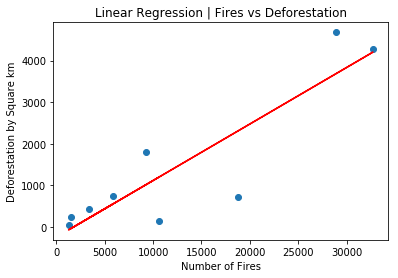

<Figure size 432x288 with 0 Axes>

In [54]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.title("Linear Regression | Fires vs Deforestation")
plt.xlabel("Number of Fires")
plt.ylabel("Deforestation by Square km")

plt.show()

plt.savefig("data/LinearRegression.png")

In [45]:
print(linear_regressor.coef_)

[[0.1359993]]


In [47]:
# Correlation Coefficient 
# and R-square 

merged.corr(method ='pearson')

,Square km,Number of Fires
Square km,1.00000,0.88839
Number of Fires,0.88839,1.00000


In [50]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.OLS(X,Y)

result=model1.fit()

print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     54.93
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           7.54e-05
Time:                        21:16:18   Log-Likelihood:                -90.991
No. Observations:                   9   AIC:                             184.0
Df Residuals:                       8   BIC:                             184.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.9848      0.942      7.411      0.0

/Users/michellefitzpatrick/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [ ]:
#multi colinearity, the two numeric variables you are looking at are too similar, regression splits in half